# Regression and Classification Assignment Solution

This assignment and this solution to the assignment uses the data discussed in regression_and_classification notebook.   You may want to review that if you
have trouble with the assignment.

## 1. The data

First we do some imports and load the data from the `sklearn` module.

In [17]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import linear_model
import numpy as np


data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']

In [18]:
features.shape

(150, 4)

In [19]:
set(target)

{0, 1, 2}

In [20]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 2.  The questions

**Q1**

Don't take my word for it that subsets of the 4 Iris features always produce a worse classifier.
Try it out.

Change the selector array in the next cell and execute the code
in the cell to try out your own favorite subsets
of features.  No subset of 2 or even 3 features performs as well as using all 4.

For example, using this selector 
```
selector = np.array([True,True,False,True])
```

leaves out just  the third feature.  Here's your challenge: Find the best 2-feature
system (it performs almost as well as any 3-feature system), and the best
3-feature system.  Hint for the 2-feature problem, if you want to get there more
quickly.  Look at our plots of two-feature systems in the "Plotting Attributes" section of the regression_and_classification.ipynb notebook (Section 2).  Which one **looks**
like it gives the best separation?

A systematic way of checking all pairs with just one evaluation run:

In [50]:
Y = target
# Collect all 6 legal index pairs for 4 features
selectors = [[i,j] for i in range(4) for j in range(i+1,4)]
scores = []
for (i,sel) in enumerate(selectors):
    logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs',multi_class='auto')
    X = features[:,sel]
    predicted = logreg.fit(X, Y).predict(X)
    scores.append(accuracy_score(Y,predicted))
    print(f"{sel} Acc: {scores[i]:.3f}")

best_sys = np.array(scores).argmax()
print()
print(f"Winner: {selectors[best_sys]} score: {scores[best_sys]:.3f}")

[0, 1] Acc: 0.833
[0, 2] Acc: 0.967
[0, 3] Acc: 0.960
[1, 2] Acc: 0.953
[1, 3] Acc: 0.953
[2, 3] Acc: 0.960

Winner: [0, 2] score: 0.967


Now let's generalize that to get average accuracies over 10 train test splits:

In [56]:
X=features
Y = target
selectors = [[i,j] for i in range(4) for j in range(i+1,4)]
num_runs = 10
scores = np.zeros((num_runs,len(selectors)))

for j in range(num_runs):
    #Uncomment this to better understand this code
    #print("Run",j)
    # Use j as the random state var to be able to replicate these train/test splits in comparisons
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,random_state=j)
    for (i,sel) in enumerate(selectors):
        logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs',multi_class='auto')
        X_train_m,X_test_m = X_train[:,sel], X_test[:,sel],
        predicted = logreg.fit(X_train_m, Y_train).predict(X_test_m)
        scores[j,i] = accuracy_score(Y_test,predicted)
        # Uncomment this to better understand this code found the best score
        #print(f"   {sel} Run {j} Acc: {scores[j,i]:.3f}")

two_feat_mean_scores = scores.mean(axis=0)
# Find the positional index of the system with the best score
best_sys = two_feat_mean_scores.argmax()
print()
print(f"Winner: {selectors[best_sys]} Avg. score: {two_feat_mean_scores[best_sys]:.3f}")


Winner: [0, 2] Avg. score: 0.960


Validating what's printed out above:

In [63]:
print(best_sys)
scores[:,best_sys].mean()

1


0.96

Validating what we saw wirh a single train/test split, there is quite a range in the mean scores:

In [34]:
two_feat_mean_scores

array([0.79333333, 0.96      , 0.94      , 0.95      , 0.93333333,
       0.94666667])

**Q2**

In the regression_and_classification notebook, 
we implemented a function called `is_non_red` that is supposed to distinguish 
class 0 from classes 1 and 2.  Here is the definition and an example of using it
on a row of the Iris dataset.

In [25]:
def is_non_red (P):
    """
    P is a data point, all 4 attributes.
    
    Return True if P is in positive class.
    """
    return (P[2] - .9*P[0] + 2) > 0

P = features[-90]
print('P is in positive class: {0}'.format(is_non_red(P)))

P is in positive class: True


We call such a function a model (a model of `non-redness`). Write some code to evaluate this model's accuracy 
in predicting non redness.  Before calling the `accuracy_score` function, 
you will have to compute `predicted` using `is_non_red` to give you an array of predictions


To create a prediction array using `is_non_red`, apply it to every row
of `features`:

```
np.apply_along_axis(is_non_red, axis=1, arr= features)
```

You will also have to evaluate accuracy against a different standard.
You can't evaluate against the class array `target` defined above
because that has three classes and `is_non_red` essentially works with two. 
You have to start by creating a different
class array that only has two classes, matching the kind of results `is_non_red` produces.
The red class is 0, so you want `True` for every class 1 or 2 iris, and
`False` for every class 0 iris. For this, use a Boolean mask on `target`.

You do not have to evaluate over different train/test splits.

In [26]:
predicted = np.apply_along_axis(is_non_red, axis=1, arr= features)
newY = target != 0
accuracy_score(predicted,newY)

1.0

This is perfect performance.  Will scikit_learn  do as well?

In [27]:
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs',multi_class='auto')
X = features
predicted2 = logreg.fit(X, newY).predict(X)
accuracy_score(newY,predicted2)

1.0

Yes, it did.  Using all features.  There are models that can do just as well using only two features

In [28]:
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs',multi_class='auto')
X = features[:,:2]
predicted2 = logreg.fit(X, newY).predict(X)
accuracy_score(newY,predicted2)

1.0

But not using one feature.

In [29]:
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs',multi_class='auto')
X = features[:,:1]
predicted2 = logreg.fit(X, newY).predict(X)
accuracy_score(newY,predicted2)

0.8933333333333333

**Q3** 

Using the `rock vs. mines` data set loaded in the next cell, draw a scatterplot of the points like the ones we did in Section 2 and 3 of this tutorial for the iris data. 
You will find the code in Section 3 of the rfegression_and_classification notebook will require the least modification.
This data set tries to distinguish two classes, rocks and mines, based on sonar readings.
Note, as the loading code indicates, this data has 60 features, which is a lot, so you should
just pick one pair of features out and plot them.  Crucially,
you **don't** need to plot all pairs (there are 1770 pairs), even though
with 60 features, you are unlikely to have much success using just two.

When modifying the code to draw the picture, bear in mind you really only need to
scatter the points.  You are not being asked to draw a separation line,
and you don't need to draw our point P, because it doesn't appear in this data.
You should try to give the points belonging to the two classes different colors
and shapes, as was done above.

In [30]:
import pandas as pd

target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks mines data
mine_df = pd.read_csv(target_url, header=None)
mine_features = mine_df.values
(samp_sz, num_feats) = mine_features.shape
print('{0} exemplars with {1} features'.format(samp_sz, num_feats))
# The last column contains the class data.  Separate it from the others.
target = mine_features[:, 60]
# Everything else is a feature
mine_features = mine_features[:, :60]
(samp_sz, num_feats) = mine_features.shape

# Find the two classes we're trying to separate.
feat_set = list(set(target))
print('{0} classes: {1}'.format(len(feat_set), feat_set))



208 exemplars with 61 features
2 classes: ['M', 'R']


In [13]:
set(target)

{'M', 'R'}

In [14]:
list(zip("MR",">o","rg"))

[('M', '>', 'r'), ('R', 'o', 'g')]

In [15]:
target

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

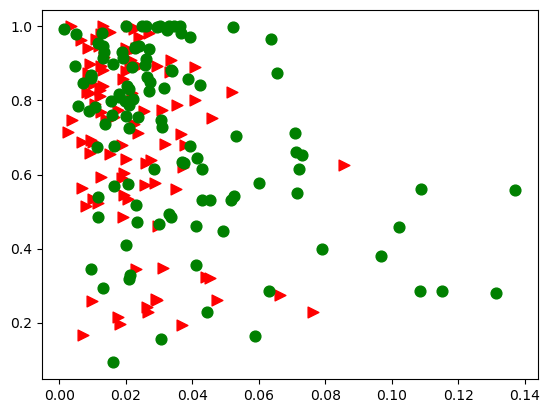

In [32]:
# Scatter the data points
from matplotlib import pyplot as plt
p0,p1 = 0,25
for t,marker,c in list(zip("RM",">o","rg")):
    #print(t,p0,p1,mine_features[target == t,p0].shape,mine_features[target == t,p1].shape)
    #print("""----""")
    plt.scatter(mine_features[target == t,p0], mine_features[target == t,p1], 
              marker=marker, c=c,s=60) 

In [ ]:
(p0,p1) = (0,2)
# Scatter the data points
for t,marker,c in zip("MR",">o","rg"):
    #print(t,p0,p1)
    #print(mine_features[target == t,p0].shape)
    #print()
    plt.scatter(mine_features[target == t,p0], mine_features[target == t,p1], 
                marker=marker, c=c,s=60) 

In [34]:
# The values from col p0 that belong to the target class
print(t,p0)
mine_features[target == t,p0]

M 0


array([0.0491, 0.1313, 0.0201, 0.0629, 0.0335, 0.0587, 0.0162, 0.0307,
       0.0116, 0.0331, 0.0428, 0.0599, 0.0264, 0.021, 0.053, 0.0454,
       0.0283, 0.0114, 0.0414, 0.0094, 0.0228, 0.0363, 0.0261, 0.0346,
       0.0162, 0.0249, 0.027, 0.0388, 0.0228, 0.0715, 0.0209, 0.0374,
       0.1371, 0.0443, 0.115, 0.0968, 0.079, 0.1083, 0.0094, 0.1088,
       0.043, 0.0731, 0.0164, 0.0412, 0.0707, 0.0526, 0.0516, 0.0299,
       0.0721, 0.1021, 0.0654, 0.0712, 0.0207, 0.0209, 0.0231, 0.0131,
       0.0233, 0.0117, 0.0211, 0.0047, 0.0201, 0.0107, 0.0235, 0.0258,
       0.0305, 0.0217, 0.0072, 0.0163, 0.0221, 0.0411, 0.0137, 0.0015,
       0.013, 0.0134, 0.0179, 0.018, 0.0329, 0.0191, 0.0294, 0.0635,
       0.0201, 0.0197, 0.0394, 0.031, 0.0423, 0.0095, 0.0096, 0.0269,
       0.034, 0.0209, 0.0368, 0.0089, 0.0158, 0.0156, 0.0315, 0.0056,
       0.0203, 0.0392, 0.0129, 0.005, 0.0366, 0.0238, 0.0116, 0.0131,
       0.0335, 0.0272, 0.0187, 0.0323, 0.0522, 0.0303, 0.026],
      dtype=object)

### Solution

What we're seeing is that the depicted features are **highly correlated**.

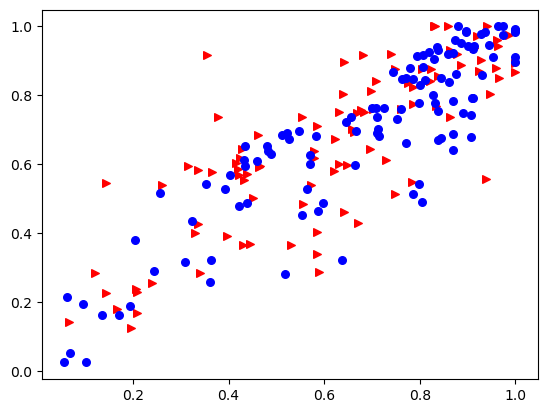

In [35]:
# Scatter the data points
from matplotlib import pyplot as plt
p0,p1 = 22,23
for t,marker,c in zip("RM",">o","rb"):
    plt.scatter(mine_features[target == t,p0], mine_features[target == t,p1], 
                marker=marker, c=c,s=30) 

This pair not so much.

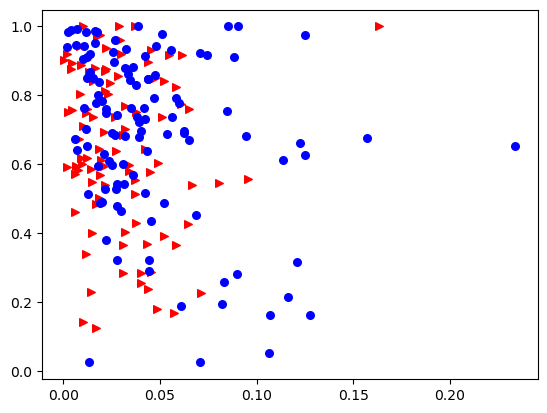

In [36]:
# Scatter the data points
from matplotlib import pyplot as plt
p0,p1 = 1,23
for t,marker,c in zip("RM",">o","rb"):
    plt.scatter(mine_features[target == t,p0], mine_features[target == t,p1], 
                marker=marker, c=c,s=30) 

**Q4**

Combining variables: Cheap non-linearity

The [Heidelberg stat-center](http://www.statlab.uni-heidelberg.de/data/iris/) reports a very nice result obtained by combining
the 2 petal features and the  2 sepal features by multiplication.  We end up with 2 **area** features, and a system that's almost as good as a 4-feature linear system,
at the cost of a little non-linearity (the multiplication). Here's the computation,
and the picture, both of which are very simple.  

Notice what the picture is telling us:  Petal area alone
is enough to almost perfectly perform the discrimination.  And the insight can easily be made visual.

Text(0, 0.5, 'petal area')

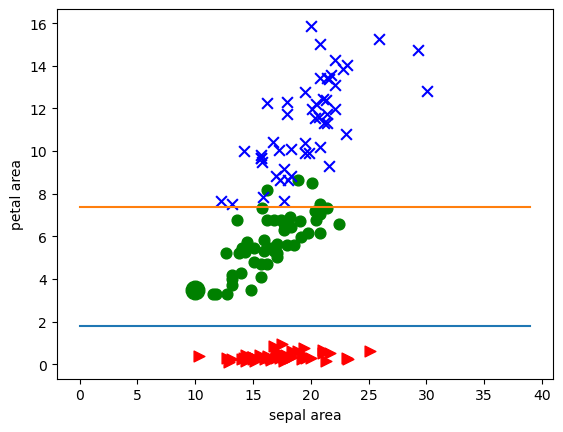

In [6]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix
import numpy as np
from matplotlib import pyplot as plt

data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']
sepal_area = features[:,0] * features[:,1]
petal_area = features[:,2] * features[:,3]

for t,marker,c in zip(list(range(3)),">ox","rgb"):
    plt.scatter(sepal_area[target == t], petal_area[target == t], marker=marker, c=c,s=60) 

# Let's draw our point P with extra special attention getting large SIZE.
p_sepal_area,p_petal_area,p_target  = sepal_area[-90],petal_area[-90],target[-90]
marker,clr = ">ox"[p_target], "rgb"[p_target]
plt.scatter(p_sepal_area,p_petal_area,marker=marker,c=clr,s=180)

# Let;s draw some linear separators, horizontal lines in this case
plt.plot(np.arange(0.,40.),np.array([1.8]*40))
plt.plot(np.arange(0.,40.),np.array([7.4]*40))
plt.axis('tight')
plt.xlabel('sepal area')
plt.ylabel('petal area')

**Q4: Part A** 

Validate what the picture is telling you by training and evaluating a `linear_model.LogisticRegression` 
classifier that uses **only** the petal area feature.  

You can define values for `petal_area` feature by evaluating the cell above.  Your
answer should be a few lines of code.  The last line should print out the
accuracy score for your classifier.

Checking feature names to get the right indices: sepal area (0,1); petal area(2,3).

In [67]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [93]:
from sklearn.model_selection import train_test_split


sepal_area = features[:,0] * features[:,1]
petal_area = features[:,2] * features[:,3]
X = petal_area[:,np.newaxis]
Y = target

random_state=80
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=random_state)

def train_test_evaluate(X_train, X_test, Y_train, Y_test, clf):
    
    clf.fit(X_train, Y_train)
    predicted = clf.predict(X_test)
    acc_A = accuracy_score(Y_test,predicted)
    prec_A,rec_A = precision_score(Y_test,predicted,average=None), recall_score(Y_test,predicted,average=None)

    print(f" Acc: {acc_A:.3f}")
    # Precision is an array of 3 scores.  We'll take it apart
    print("Prec: ",end=" ")
    for (i,species) in enumerate(data['target_names']):
         print(f"{species}: {prec_A[i]:.3f}",end=" ")
    print()
    print(" Rec: ",end=" ")
    for (i,species) in enumerate(data['target_names']):
         print(f"{species}: {rec_A[i]:.3f}",end=" ")
    print()
    return predicted, acc_A, prec_A, rec_A

logreg = linear_model.LogisticRegression(C=1e5)
predicted, acc_A, prec_A, rec_A = train_test_evaluate(X_train, X_test, Y_train, Y_test,clf=logreg)

 Acc: 0.967
Prec:  setosa: 1.000 versicolor: 1.000 virginica: 0.857 
 Rec:  setosa: 1.000 versicolor: 0.909 virginica: 1.000 


As you can see, displaying the precision and recall scores just got more complicated.

Here is the classification report; by default it's a formatted string you can print.
It's got everything we printed out above, plus some.

In [94]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,predicted,digits=3))
#print(classification_report.__doc__)

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     0.909     0.952        11
           2      0.857     1.000     0.923         6

    accuracy                          0.967        30
   macro avg      0.952     0.970     0.958        30
weighted avg      0.971     0.967     0.967        30



To embed the precision/recall/accuracy numbers in the classification report in a 
structure, have it return a dictionary instead of a string.  At that point it might
be nice to use a DataFrame:

In [95]:
import pandas as pd

df_A = pd.DataFrame.from_dict(classification_report(Y_test,predicted,output_dict=True))
# Just keep the good stuff. 
df_A = df_A.iloc[:2,:3]
# Replace species numbers with names
df_A.columns = data['target_names']
#Flip so that the rows correspond to species
df_A = df_A.T
# Now create df "style" instance and tweak it for display
df_A_style = df_A.style.background_gradient(cmap=plt.cm.Blues).format(precision=3)
df_A_style

,precision,recall
setosa,1.000,1.000
versicolor,1.000,0.909
virginica,0.857,1.000


The color coding is by **column**,  so the best precisions are in dark blue,
followed by light blue in the precision column.

Here's everything we did above redone via the other (usefully named) `metrics` function
`precision_recall_fscore_support`.

In [96]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support


(p,r,f,s) = precision_recall_fscore_support(Y_test,predicted,average=None)
# orient=index means the keys in the dictionary are used as index entries
df_A2 = pd.DataFrame.from_dict({"Prec":p, "Rec":r}, orient="index", columns=data['target_names']).T
df_A2.style.background_gradient(cmap=plt.cm.Blues).format(precision=3)

,Prec,Rec
setosa,1.000,1.000
versicolor,1.000,0.909
virginica,0.857,1.000


#### Scikit learn polynomial features variant

Using sklearn's polynomial transformation, the results are identical to just
using the area feature alone.  In other word the model using just the feature `ab`
is identical to the model using `[a, b, ab]`, where a and b are petal length
and petal width.

In [97]:
from sklearn import preprocessing
from sklearn import pipeline

petal_feats = features[:,2:4]

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False,interaction_only=True)
scaler = preprocessing.StandardScaler()
logreg = linear_model.LogisticRegression(C=1e5)

pipeline_clf = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('k2', logreg)])

predicted_P, acc_P, prec_P, rec_P = train_test_evaluate(X_train, X_test, Y_train, Y_test,clf=pipeline_clf)

 Acc: 0.967
Prec:  setosa: 1.000 versicolor: 1.000 virginica: 0.857 
 Rec:  setosa: 1.000 versicolor: 0.909 virginica: 1.000 


In [73]:
pipeline_clf.fit(X_train, Y_train)
predicted = pipeline_clf.predict(X_test)

acc_P = accuracy_score(Y_test,predicted)
prec_P,rec_P = precision_score(Y_test,predicted,average=None), recall_score(Y_test,predicted,average=None)

print(f" Acc: {acc_P:.3f}")
# Precision is an array of 3 scores.  We'll take it apart
print("Prec: ",end=" ")
for (i,species) in enumerate(data['target_names']):
     print(f"{species}: {prec_P[i]:.3f}",end=" ")
print()
print(" Rec: ",end=" ")
for (i,species) in enumerate(data['target_names']):
     print(f"{species}: {rec_P[i]:.3f}",end=" ")
print()

 Acc: 0.967
Prec:  setosa: 1.000 versicolor: 0.875 virginica: 1.000 
 Rec:  setosa: 1.000 versicolor: 1.000 virginica: 0.917 


Note that this parameterization of `preprocessing.PolynomialFeatures` does indeed give 
a 3-feature model where the third feature is just the product of the other 2, as advertised:

In [98]:
from sklearn import preprocessing

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False,interaction_only=True)
petal_feats = features[:,2:4]
print(petal_feats.shape)
k2_representation = poly.fit_transform(petal_feats)
print(k2_representation.shape)

(150, 2)
(150, 3)


Look at the first row in both representations:

In [99]:
print(petal_feats[0,:])
print(k2_representation[0,:])

[1.4 0.2]
[1.4  0.2  0.28]


**Q4: Part B** 

Train and evaluate a `linear_model.LogisticRegression` 
classifier that uses **both** the petal area feature and the sepal area feature.  
Guidelines as with the last problem.


**Answer**:  The tricky part is mashing together the 150x2 matrix we can use for training.

Here's one way.

In [128]:
X = np.hstack([petal_area[:,np.newaxis],sepal_area[:,np.newaxis]])
# Equivalent to
#X = np.concatenate([petal_area[:,np.newaxis],sepal_area[:,np.newaxis]],axis=1)
X.shape

(150, 2)

Use the same train/test split (by way of using the same random state); train,test, eval.

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=random_state)
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear',multi_class='auto')
predicted, acc_A, prec_A, rec_A = train_test_evaluate(X_train, X_test, Y_train, Y_test,clf=logreg)

 Acc: 0.967
Prec:  setosa: 1.000 versicolor: 1.000 virginica: 0.857 
 Rec:  setosa: 1.000 versicolor: 0.909 virginica: 1.000 


In [104]:
(p,r,f,s) = precision_recall_fscore_support(Y_test,predicted,average=None)
# orient=index means the keys in the dictionary are used as index entries
df_2A = pd.DataFrame.from_dict({"Prec":p, "Rec":r}, orient="index", columns=data['target_names']).T
df_2A.style.background_gradient(cmap=plt.cm.Blues).format(precision=3)

,Prec,Rec
setosa,1.000,1.000
versicolor,1.000,0.909
virginica,0.857,1.000


**Q4 Part C**

Train and evaluate a `linear_model.LogisticRegression` 
classifier that uses both  area features **as well as** the original 4 features.
Does this do better than a classifier trained on the original 4 features?


Having done the last problem this is a piece of cake:

In [105]:
X = np.hstack([features, petal_area[:,np.newaxis],sepal_area[:,np.newaxis]])
X.shape

(150, 6)

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=47)

In [107]:

# Note using the LBFGS solver spits out some warnings. ThiS may have to do with
# the fact that some of the features have values that are much larger than the others.
# In any case the score is unaffected.
# Scaling would make the warnings go away. Or change solvers as I have.
# logreg = linear_model.LogisticRegression(C=1e5,solver='lbfgs',multi_class='auto')
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear',multi_class='auto')

logreg.fit(X_train, Y_train)
predicted = logreg.predict(X_test)
acc_6 = accuracy_score(Y_test,predicted)
acc_6

1.0

In [108]:
(p,r,f,s) = precision_recall_fscore_support(Y_test,predicted,average=None)
# orient=index means the keys in the dictionary are used as index entries
df_6 = pd.DataFrame.from_dict({"Prec":p, "Rec":r}, orient="index", columns=data['target_names']).T
df_6.style.background_gradient(cmap=plt.cm.Blues).format(precision=3)

,Prec,Rec
setosa,1.000,1.000
versicolor,1.000,1.000
virginica,1.000,1.000


The original 4 features:

In [109]:

X = features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=47)
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear',multi_class='auto')
predicted, acc_A, prec_A, rec_A = train_test_evaluate(X_train, X_test, Y_train, Y_test,clf=logreg)

 Acc: 0.967
Prec:  setosa: 1.000 versicolor: 0.875 virginica: 1.000 
 Rec:  setosa: 1.000 versicolor: 1.000 virginica: 0.917 


In [110]:
# Scikit learn note: using the LBFGS solver spits out some warnings. ThiS may have to do with
# the fact that the area features have values that are significantly larger than the others.
# In any case the score is unaffected.
# Scaling would make the warnings go away. Or change solvers as I have.
# logreg = linear_model.LogisticRegression(C=1e5,solver='lbfgs',multi_class='auto')

X = features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=47)
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear',multi_class='auto')

logreg.fit(X_train, Y_train)
predicted = logreg.predict(X_test)
acc_4 = accuracy_score(Y_test,predicted)
acc_4

0.9666666666666667

In [111]:
(p,r,f,s) = precision_recall_fscore_support(Y_test,predicted,average=None)
# orient=index means the keys in the dictionary are used as index entries
df_4 = pd.DataFrame.from_dict({"Prec":p, "Rec":r}, orient="index", columns=data['target_names']).T
df_4.style.background_gradient(cmap=plt.cm.Blues).format(precision=3)

,Prec,Rec
setosa,1.000,1.000
versicolor,0.875,1.000
virginica,1.000,0.917


Is the 6-feature model better? By accuracy, Yes!

In [112]:
acc_4 < acc_6

True

To do the other comparisons, we ask where the 6-feature model evaluations beat the 4 feature model
scores, The answer is: In three cases

In [113]:
df_4 < df_6

,Prec,Rec
setosa,False,False
versicolor,True,False
virginica,False,True


This shows the advantage of keeping system evaluation scores in structures like
pandas DataFrames.  It facilitates comparisons between systems.

Want numbers? Up to precision level 3?

In [115]:
#df_6 - df_4
(df_6-df_4).style.background_gradient(cmap=plt.cm.Blues).format(precision=3)

,Prec,Rec
setosa,0.000,0.000
versicolor,0.125,0.000
virginica,0.000,0.083


Is this difference significant?  Certainly not, because we've only seen it in one training/test split.

#### Folding multiple train/test splits into a test run

To validate the improvement, we'd try a number of training test splits and take the averages.

There are a variety of ways of implementing this, but one very clean and instructive path
is to use arrays to store the evaluation scores.

The result nicely illustrates some of the benefits of programming with arrays,
in particular, the elegance that can be achieved by applying operations along an
axis.

The code looks like this:

In [1]:
# Code from previous parts of the notebook that may be needed here (if restarting)
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import linear_model
import numpy as np


data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']

sepal_area = features[:,0] * features[:,1]
petal_area = features[:,2] * features[:,3]

In [41]:
num_runs=10
num_classes = len(data['target_names'])
num_systems = 2

X6 = np.hstack([features, petal_area[:,np.newaxis],sepal_area[:,np.newaxis]])
X4 = features
Y = target 

# acc_scores is 2x10 (2 systems, 10 runs)
acc_scores = np.zeros((num_systems,num_runs))
#prec_scores is 2x10x3 (2 systems, 10 runs, 3 classes)
#prec_scores[0,:,:] is the 10x3 array for all system 0 scores
#prec_scores[0,2,:] is the 1D array of length 3 for the system 0, run 2 class-by-class precision scores
prec_scores = np.zeros((num_systems,num_runs,num_classes))
rec_scores = np.zeros((num_systems,num_runs,num_classes))


for i in range(num_runs):
    split4 = train_test_split(X4, Y, test_size=.2, random_state=i)
    split6 = train_test_split(X6, Y, test_size=.2, random_state=i)
    # Check both systems used the same train/test split on this run
    assert (split4[2]==split6[2]).all(), "Oops!"
    systems = [split4,split6]
    for (j,[X_train, X_test, Y_train, Y_test]) in enumerate(systems):
        logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear',multi_class='auto')
        logreg.fit(X_train, Y_train)
        predicted = logreg.predict(X_test)
        acc_scores[j,i] = accuracy_score(Y_test,predicted)
        prec_scores[j,i,:] = precision_score(Y_test,predicted,average=None)
        rec_scores[j,i,:] = recall_score(Y_test,predicted,average=None)

acc4,acc6 = acc_scores.mean(axis=1)
prec4,prec6 = prec_scores.mean(axis=1)
rec4,rec6 = rec_scores.mean(axis=1)

df_4 = pd.DataFrame.from_dict({"Prec":prec4, "Rec":rec4}, orient="index", columns=data['target_names']).T
df_6 = pd.DataFrame.from_dict({"Prec":prec6, "Rec":rec6}, orient="index", columns=data['target_names']).T

print(f"Acc Delta: {acc6 - acc4:.3f}")
df_6 - df_4

Acc Delta: 0.007


,Prec,Rec
setosa,0.000000,0.000000
versicolor,0.013085,0.008333
virginica,0.005909,0.009091


We got *tiny* improvement across 10 train/test splits in accuracy and in all the precision/recall scores where improvement was possible (the setosa scores were already perfect).  So we have some reason to be confident of a real improvement, but not a lot.

Code note: the notable feature is the use of arrays to store the scores, which enables the use of `.mean()` in lines 29-31 to find mean scores across all runs. For accuracy a 2D array is fine:
we have 10 runs and 2 systems so we create a 2x10 array in line 7.
For precision and recall we need class-by-class precision recall scores for 
each train/test split and  each system, so we use a 2x10x3 array (a 3D array).
Note how the arrays are accessed in lines 26-28, and how the means of all test runs are all  taken 
using axis 1.  In the case of the 2D array that that gives us 1D array of size 2 containing mean accuracies
for the 2 systems. 

```python
>>> acc_scores.mean(axis=1)
array([0.95      , 0.95666667])
```

In the case of the 10x2x3 score arrays, taking the mean along axis 1 yields a 2x3 array,
with each row containing the class-by-class mean scores for a system. For example,

```python
>>> prec_scores.mean(axis=1)
array([[1.        , 0.91734266, 0.92849206],
       [1.        , 0.93042735, 0.93440115]])
```
yields an array in which the first row is the class-by-class means for the system 0's precision.

```python
prec4,prec6 = prec_scores.mean(axis=1)
```
then assigns that first row to `prec4`, which is used in line 33, in making `df4`, the
scores for the 4-feature system.


**Programming note two** on doing operations **along an axis** in numpy.

The key in thinking about which axis to use is to think about which dimension you want to "aggregate away":

In [47]:
print(acc_scores.shape)
print(f"Axis 0 means: {acc_scores.mean(axis=0).shape}") # The dimension of size 2 is aggregated over
print(f"Axis 1 means: {acc_scores.mean(axis=1).shape}") # The dimension of size 10 is aggregated over

(2, 10)
Axis 0 means: (10,)
Axis 1 means: (2,)


In [48]:
print(prec_scores.shape)
print(f"Axis 0 means: {prec_scores.mean(axis=0).shape}") # The dimension of size 2 is aggregated over
print(f"Axis 1 means: {prec_scores.mean(axis=1).shape}") # The dimension of size 10 is aggregated over
print(f"Axis 2 means: {prec_scores.mean(axis=2).shape}") # The dimension of size 3 is aggregated over

(2, 10, 3)
Axis 0 means: (10, 3)
Axis 1 means: (2, 3)
Axis 2 means: (2, 10)


We wanted the means of the 10 test runs so we were aggregating away axis 1 in both cases.

When concatenating two 2D arrays, you are going add sizes in one dimension.  The axis where the sizes
are added is the one to concatenate on:

In [120]:
a_4_6 = np.zeros((4,6))
print(a_4_6.shape)                 
print(f"concatenate on axis 0: {np.concatenate([a_4_6,a_4_6],axis=0).shape}")
print(f"concatenate on axis 1: {np.concatenate([a_4_6,a_4_6],axis=1).shape}")

(4, 6)
concatenate on axis 0: (8, 6)
concatenate on axis 1: (4, 12)


**Q4 Part D**

Train and evaluate a `linear_model.LogisticRegression` 
classifier that uses a 2-feature PCA representation of the iris data,
as was done in Section 7 of the Regression and Classification notebook.
Does this do better than any of the other 2-feature classifier
models (including the 2D projection models  in Q1
and the one in part B that used two area features)? 


In [30]:
import sklearn.decomposition as dec
X = features
Y = target
num_runs = 10
accs_pca = np.zeros((num_runs,))


for i in range(num_runs):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,random_state=i)
    logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear',multi_class='auto')
    pca_tf = dec.PCA(n_components=2)
    X_train_reduced = pca_tf.fit_transform(X_train)
    # Note we use transform not fit_transform on the test data.  PCA is part of our model
    # of the data.  No model-fitting on the test data.
    X_test_reduced = pca_tf.transform(X_test)
    logreg.fit(X_train_reduced,Y_train)
    predicted = logreg.predict(X_test_reduced)
    accs_pca[i] = accuracy_score(Y_test,predicted)

accs_pca.mean()

0.9533333333333334

Comparing what we saw back in Q1, here are the mean accuracy scores for our 6 two-feature models:

In [26]:
two_feat_mean_scores

array([0.79333333, 0.96      , 0.94      , 0.95      , 0.93333333,
       0.94666667])

So the PCA model wins that evaluation --- by a hair.

Redoing the Part B evaluation to be comparable:

In [31]:
num_runs = 10
sepal_area = features[:,0] * features[:,1]
petal_area = features[:,2] * features[:,3]
X = np.hstack([petal_area[:,np.newaxis],sepal_area[:,np.newaxis]])
Y = target
accs_two_areas = np.zeros((num_runs,))

for i in range(num_runs):
    # We are actually using the same train/test splits as we used for pca.
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=i)
    logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear',multi_class='auto')
    logreg.fit(X_train,Y_train)
    predicted = logreg.predict(X_test)
    accs_two_areas[i] = accuracy_score(Y_test,predicted)

accs_arr.mean()


1.0

The two area-features system is the winner...

### Question 5 (Optional)

We use a modified version of the code above, because
we are comparing two systems on the same data and want different train/test splits.

In this we will average over 10 runs **and** we will do accuracy, precision,
and recall evaluations, dealing with the fact that precision and recall
return class by class scores (3 scores per run).

In [35]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler

In [48]:
num_runs=10
num_classes = len(data['target_names'])
num_systems = 2

pre_X = np.hstack([petal_area[:,np.newaxis],sepal_area[:,np.newaxis]])
X = StandardScaler().fit_transform(pre_X)
Y = target 

# acc_scores is 2x10 (2 systems, 10 runs)
acc_scores = np.zeros((num_systems,num_runs))
#prec_scores is 2x10x3 (2 systems, 10 runs, 3 classes)
#prec_scores[0,:,:] is the 10x3 array for all system 0 scores
#prec_scores[0,2,:] is the 1D array of length 3 for the system 0, run 2 class-by-class precision scores
prec_scores = np.zeros((num_systems,num_runs,num_classes))
rec_scores = np.zeros((num_systems,num_runs,num_classes))
log_marg_likelihoods = np.zeros((num_systems,num_runs))

for i in range(num_runs):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=i)
    kernel = 1.0 * RBF([1.0])
    gpc_i = GaussianProcessClassifier(kernel=kernel,random_state=i)
    kernel = 1.0 * RBF([1.0, 1.0])
    gpc_a = GaussianProcessClassifier(kernel=kernel,random_state=i)
    systems = [gpc_i,gpc_a]
    for (j,gpc) in enumerate(systems):
        gpc.fit(X_train, Y_train)
        predicted = gpc.predict(X_test)
        log_marg_likelihoods[j,i]  = gpc.log_marginal_likelihood(gpc.kernel_.theta)
        acc_scores[j,i] = accuracy_score(Y_test,predicted)
        prec_scores[j,i,:] = precision_score(Y_test,predicted,average=None)
        rec_scores[j,i,:] = recall_score(Y_test,predicted,average=None)

acc_i,acc_a = acc_scores.mean(axis=1)
llm_i,llm_a = log_marg_likelihoods.max(axis=1)

prec_i,prec_a = prec_scores.mean(axis=1)
rec_i,rec_a = rec_scores.mean(axis=1)

df_i = pd.DataFrame.from_dict({"Prec":prec_i, "Rec":rec_i}, orient="index", columns=data['target_names']).T
df_a = pd.DataFrame.from_dict({"Prec":prec_a, "Rec":rec_a}, orient="index", columns=data['target_names']).T


print(f"Acc Delta: {acc_a - acc_i:.3f}")
df_a - df_i

/Users/gawron/opt/anaconda3/envs/p310/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Acc Delta: 0.013


,Prec,Rec
setosa,0.015789,0.000000
versicolor,-0.004069,0.047500
virginica,-0.001111,0.026667


In [38]:
df_a

,Prec,Rec
setosa,1.00000,1.000000
versicolor,0.91000,0.922939
virginica,0.92531,0.916162


In [39]:
df_i

,Prec,Rec
setosa,0.984211,1.000000
versicolor,0.914069,0.875439
virginica,0.926421,0.889495


The anisotropic system seems to have achieved better performance, especially in versicolor recall.

We can also eyeball a comparison with the systems evaluated in Q4.  We see that the 6-feature system still seems to be a winner.  In that comparison we are changing two factors, the classifier and the representation of the data, so if inspired to do so, you might want to investigate a more appropriate classifier on classifier faceoff, the  6-feature system from the last problem versus a 6-feature system GPC with the
appropriate anisotropic kernel, which would allow variation in 6 dimensions:

```python
kernel = 1.0 * RBF([1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
```

Warning:  You will probably get lots of warnings when you try this.  They are mostly there
to tell you the model is not optimal, and a better model might be lying in wait.  But persevere. You will still
get results.

In [42]:
df_a - df_4

,Prec,Rec
setosa,0.000000,0.000000
versicolor,-0.007343,-0.000758
virginica,-0.003182,-0.009091


In [43]:
df_a - df_6

,Prec,Rec
setosa,0.000000,0.000000
versicolor,-0.020427,-0.009091
virginica,-0.009091,-0.018182


In [44]:
df_4

,Prec,Rec
setosa,1.000000,1.000000
versicolor,0.917343,0.923697
virginica,0.928492,0.925253


Coding note:  The warning in my output refers to the k1_constant_value bounds on the kernel,
which are hyperparameters used to constrain the search for the k1_constant value parameter
of the optimal kernel.  My preliminary investigation shows that this value can't simply
be changed by assignment to the array of kernel bounds (`kernel.k1.bounds`) when the kernel
is created, so the  kernel class definition is  probably the place to go to change the bound (define a subclass of  `RBF`) but I am not at all sure that chasing this warning message is a good idea,
or that it will affect performance in the slightest.  

As far as average log marginal likelihood over the
10 runs goes, `llm_a` is also the winner, and by quite a bit:

In [47]:
llm_i,llm_a

(-11.343278939940776, -8.054729668819624)